# Vector Autoregression

In this notebook we will run Vector Autoregression (VAR) using python packages. We will revisit the exercise from Vector Autoregression by Stock and Watson (2001).

## VAR(p) Process##

We are interested in modeling a $T\times K$ multivariate time series $Y$, where $T$ denotes the number of observations and $K$ the number of variables. One way of estimating relationships between the time series and their lagged values is the vector autoregression process:

$$
Y_t = A + B_1 Y_{t-1} + B_2 Y_{t-2} + \cdots + A_p Y_{t-p} + u_t
$$
where $u_t \sim N(0,\sigma_u)$ and $A_i$ is a $K\times K$ coefficient matrix. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

### Prepare data

In [37]:
data = pd.read_excel('SW2001_data.xlsx')
data.index = pd.DatetimeIndex(data['obs'])
data_use = data[['Inflation','Unemployment','Fed Funds']]

In [18]:
data_use.head(10)

Inflation  Unemployment  Fed Funds
obs                                           
1960-01-01   0.908472      5.133333   3.933333
1960-04-01   1.810777      5.233333   3.696667
1960-07-01   1.622720      5.533333   2.936667
1960-10-01   1.795335      6.266667   2.296667
1961-01-01   0.537033      6.800000   2.003333
1961-04-01   0.714924      7.000000   1.733333
1961-07-01   0.891862      6.766667   1.683333
1961-10-01   1.067616      6.200000   2.400000
1962-01-01   2.303439      5.633333   2.456667
1962-04-01   1.234841      5.533333   2.606667

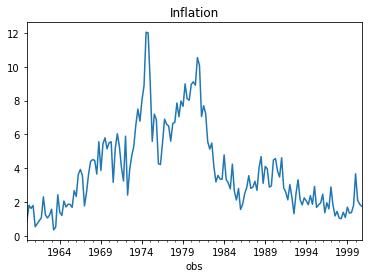

In [31]:
data['Inflation'].plot(title = 'Inflation')

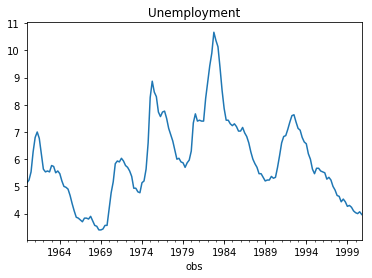

In [32]:
data['Unemployment'].plot(title = 'Unemployment')

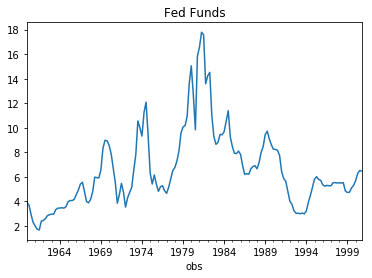

In [33]:
data['Fed Funds'].plot(title = 'Fed Funds')

In [38]:
# compute changes
data_ret = np.log(data_use).diff().dropna()
# construct model
model = VAR(data_ret)

### Fitting

In [39]:
# Fit model using 8 lags
results = model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Oct, 2019
Time:                     22:10:24
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -11.9402
Nobs:                     155.000    HQIC:                  -12.8147
Log likelihood:           454.689    FPE:                1.50862e-06
AIC:                     -13.4128    Det(Omega_mle):     9.63293e-07
--------------------------------------------------------------------
Results for equation Inflation
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.006230         0.024131           -0.258           0.796
L1.Inflation           -0.514844         0.084061           -6.125           0.000
L1.Unemployment        -1.748654         0.75404

### Plot autocurrelation function

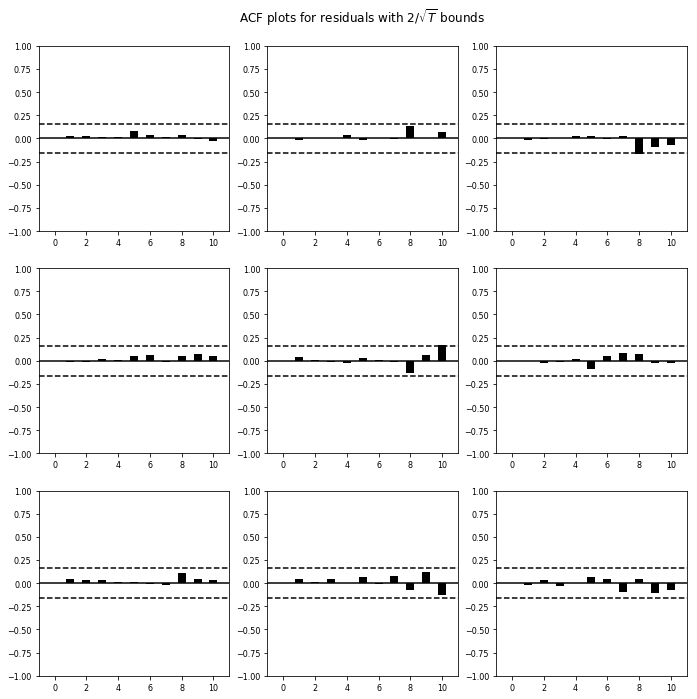

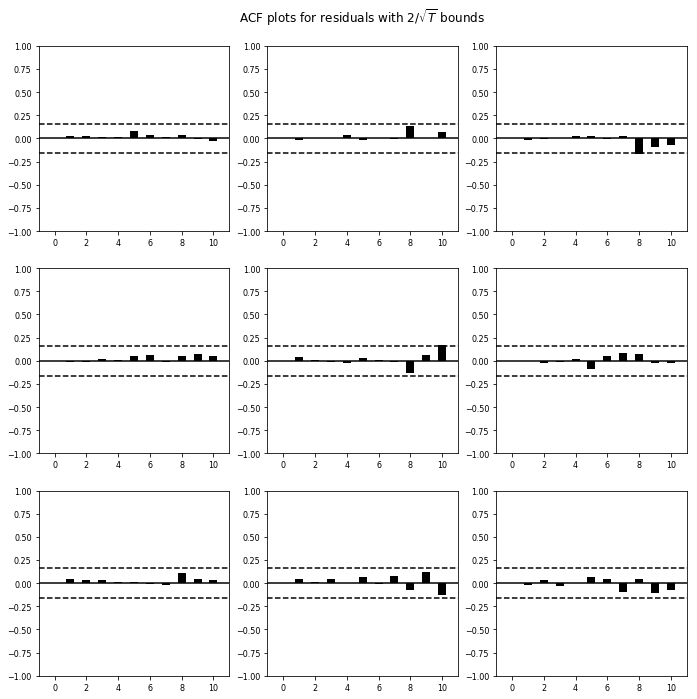

In [40]:
results.plot_acorr()

### Forecasting

In [43]:
lag_order = results.k_ar
# forecast 8 periods foreward
results.forecast(data_ret.values[-lag_order:],8)

array([[ 0.26208636, -0.00142003,  0.04035941],
       [-0.18498492,  0.01331739, -0.0058817 ],
       [ 0.01173027, -0.00553678,  0.06132789],
       [ 0.1458359 ,  0.01553199, -0.00364107],
       [ 0.05902579,  0.02686258, -0.02417997],
       [-0.10098058,  0.01769744, -0.02785083],
       [-0.05486938,  0.00946074,  0.00594001],
       [ 0.05403755,  0.00719963, -0.02022299]])

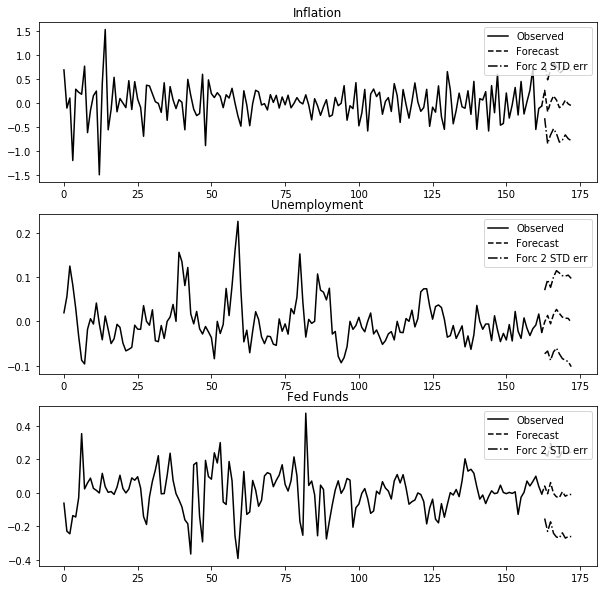

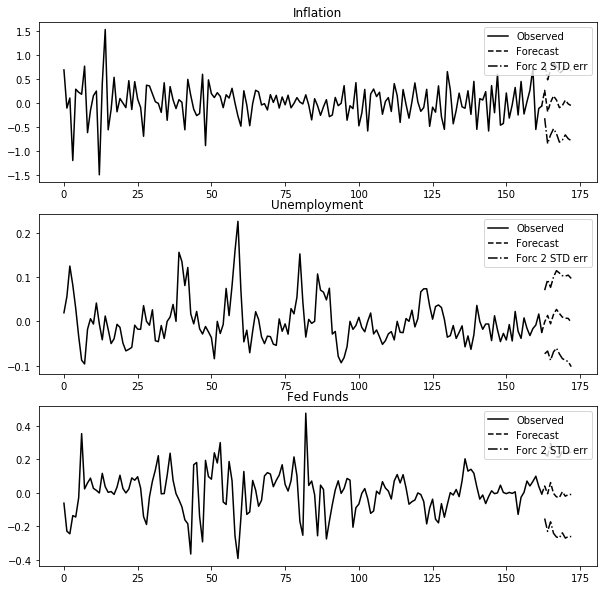

In [44]:
results.plot_forecast(10)

### Impulse Response Function (IRF)

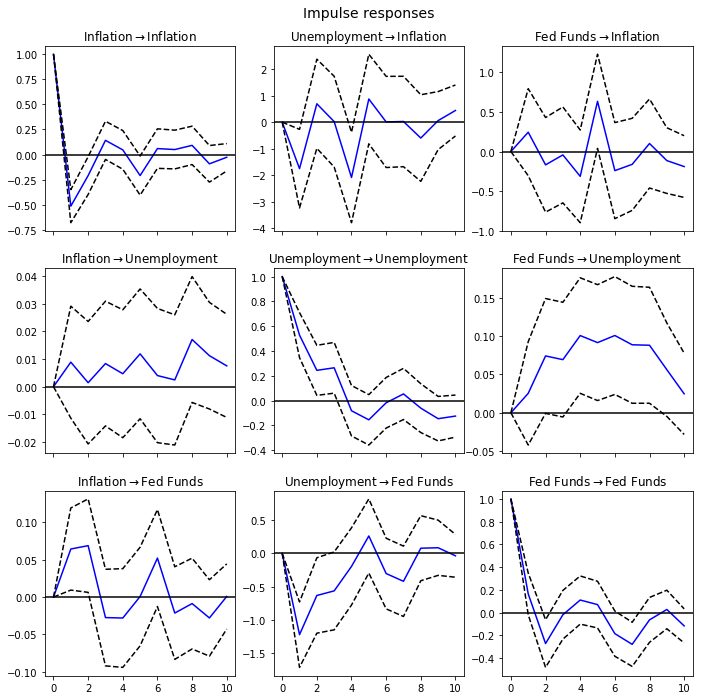

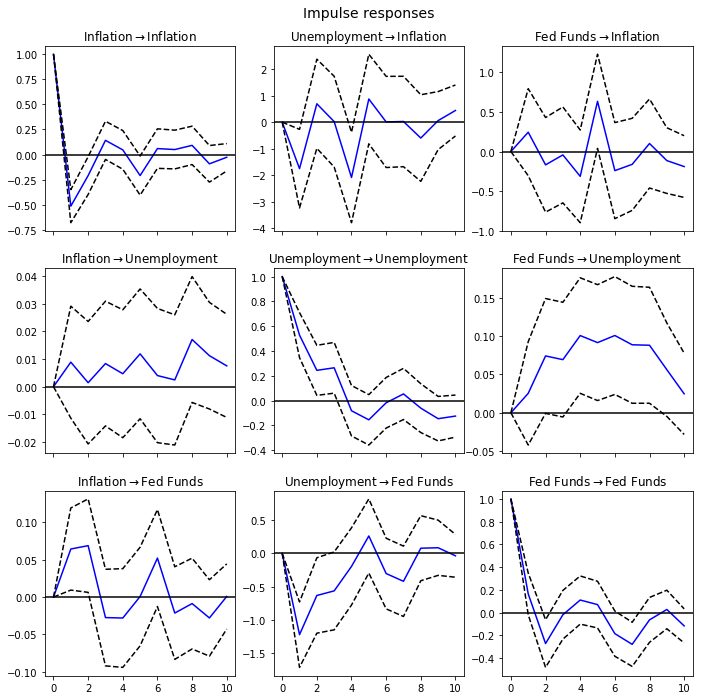

In [47]:
irf = results.irf(10)
irf.plot(orth=False)

### Cumulative Effect

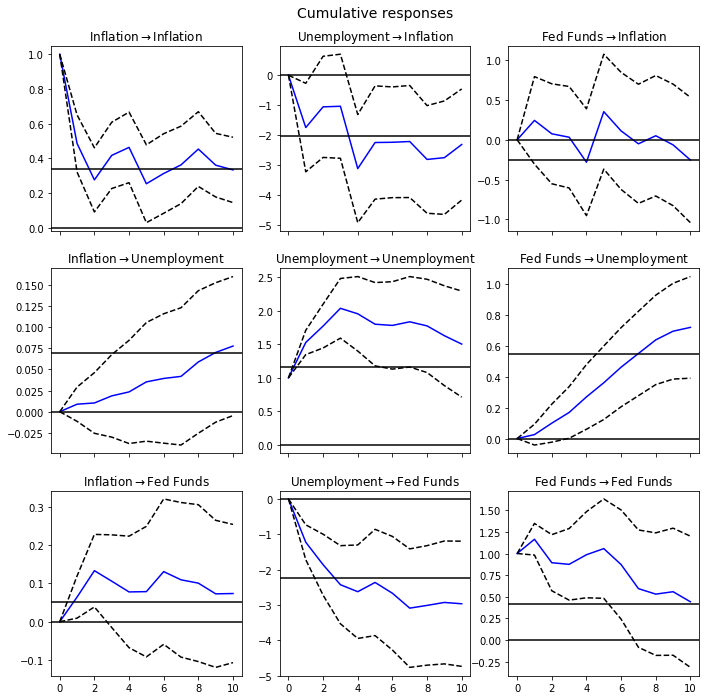

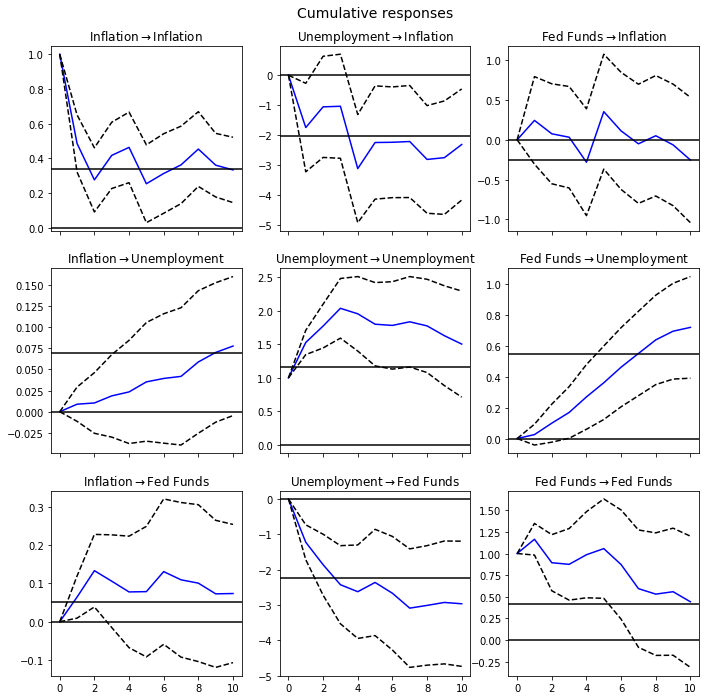

In [48]:
irf.plot_cum_effects(orth=False)